### fasi preliminari del lavoro

In [5]:
#installo le librerie necessarie per il grafico per fittare il modello
!pip install seaborn
!pip install scikit-learn

In [6]:
import matplotlib.pyplot as plt #importo la libreari matplotlib
import seaborn as sns # importo la libreria seaborn
import pandas as pd #importo la libreria pandas
import numpy as np # importo la libreria numpy

In [7]:
# preparo le librerie che userò per il modello k-means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

### 1. importo il file coffe.cvs

In [8]:
# creo per il file .csv un df di nome coffe
coffe = pd.read_csv("https://raw.githubusercontent.com/MPL29/big_data_assigment/main/Assignment-del-20-giugno-2022---Statistica-per-i-big-data-main/data-modelling/coffe.csv.csv?token=GHSAT0AAAAAABV63LCTKGZHAJ7ZLL3SBN3GYVZUH6A")
coffe.head()

,Unnamed: 0,coffee_id,species,country_of_origin,continent,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,high_quality
0,0,1,Arabica,Ethiopia,Africa,90.58,8.75,8.67,8.83,8.67,8.75,8.50,8.42,1
1,1,2,Arabica,Ethiopia,Africa,89.92,8.58,8.75,8.67,8.50,8.58,8.42,8.42,1
2,2,3,Arabica,Guatemala,North America,89.75,9.25,8.42,8.50,8.42,8.42,8.33,8.42,1
3,3,4,Arabica,Ethiopia,Africa,89.00,8.67,8.17,8.58,8.42,8.42,8.50,8.25,1
4,4,5,Arabica,Ethiopia,Africa,88.83,8.58,8.25,8.50,8.25,8.50,8.42,8.33,1


In [9]:
# elimino la colonna unnamed: 0 che non riporta alcun dato 
coffe_df = coffe.drop(["Unnamed: 0"], 1)  # elimino la colonna unnamed: 0 che non riporta alcun dato 
coffe_df.head()

C:\Users\matte\AppData\Local\Temp/ipykernel_7136/785856655.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  coffe_df = coffe.drop(["Unnamed: 0"], 1)  # elimino la colonna unnamed: 0 che non riporta alcun dato


,coffee_id,species,country_of_origin,continent,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,high_quality
0,1,Arabica,Ethiopia,Africa,90.58,8.75,8.67,8.83,8.67,8.75,8.50,8.42,1
1,2,Arabica,Ethiopia,Africa,89.92,8.58,8.75,8.67,8.50,8.58,8.42,8.42,1
2,3,Arabica,Guatemala,North America,89.75,9.25,8.42,8.50,8.42,8.42,8.33,8.42,1
3,4,Arabica,Ethiopia,Africa,89.00,8.67,8.17,8.58,8.42,8.42,8.50,8.25,1
4,5,Arabica,Ethiopia,Africa,88.83,8.58,8.25,8.50,8.25,8.50,8.42,8.33,1


### 2. esploro i dati 

In [10]:
# visualizzo il mio df
coffe_df 

,coffee_id,species,country_of_origin,continent,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,high_quality
0,1,Arabica,Ethiopia,Africa,90.58,8.75,8.67,8.83,8.67,8.75,8.50,8.42,1
1,2,Arabica,Ethiopia,Africa,89.92,8.58,8.75,8.67,8.50,8.58,8.42,8.42,1
2,3,Arabica,Guatemala,North America,89.75,9.25,8.42,8.50,8.42,8.42,8.33,8.42,1
3,4,Arabica,Ethiopia,Africa,89.00,8.67,8.17,8.58,8.42,8.42,8.50,8.25,1
4,5,Arabica,Ethiopia,Africa,88.83,8.58,8.25,8.50,8.25,8.50,8.42,8.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1335,Robusta,Ecuador,South America,78.75,7.83,7.75,7.58,7.33,7.58,5.08,7.83,0
1335,1336,Robusta,Ecuador,South America,78.08,8.58,7.50,7.67,7.75,7.75,5.17,5.25,0
1336,1337,Robusta,United States of America,North America,77.17,7.17,7.33,7.33,7.17,7.42,7.50,7.17,0
1337,1338,Robusta,India,Asia,75.08,6.92,7.42,6.83,6.75,7.17,7.25,7.00,0


calcolo la matrice di correlazione per individuare le variabili che si spiegano a vicenda

In [11]:
coffe_df.corr() 

,coffee_id,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,high_quality
coffee_id,1.000000,-0.678978,-0.661414,-0.591209,-0.694504,-0.685923,-0.613745,-0.552762,-0.651939,-0.848138
total_cup_points,-0.678978,1.000000,0.790217,0.791627,0.874279,0.860656,0.797024,0.757165,0.828502,0.528989
cupper_points,-0.661414,0.790217,1.000000,0.687288,0.793197,0.785123,0.698151,0.633208,0.721132,0.553735
aroma,-0.591209,0.791627,0.687288,1.000000,0.813259,0.777056,0.723582,0.673006,0.708634,0.502832
flavor,-0.694504,0.874279,0.793197,0.813259,1.000000,0.895672,0.816688,0.735720,0.792290,0.569736
aftertaste,-0.685923,0.860656,0.785123,0.777056,0.895672,1.000000,0.792255,0.734306,0.809639,0.570219
acidity,-0.613745,0.797024,0.698151,0.723582,0.816688,0.792255,1.000000,0.706435,0.733017,0.511360
body,-0.552762,0.757165,0.633208,0.673006,0.735720,0.734306,0.706435,1.000000,0.757597,0.472666
balance,-0.651939,0.828502,0.721132,0.708634,0.792290,0.809639,0.733017,0.757597,1.000000,0.532238
high_quality,-0.848138,0.528989,0.553735,0.502832,0.569736,0.570219,0.511360,0.472666,0.532238,1.000000


data la grande mole di dati uso una heatmap per interpretare più facilemente la soluzione

<AxesSubplot:>

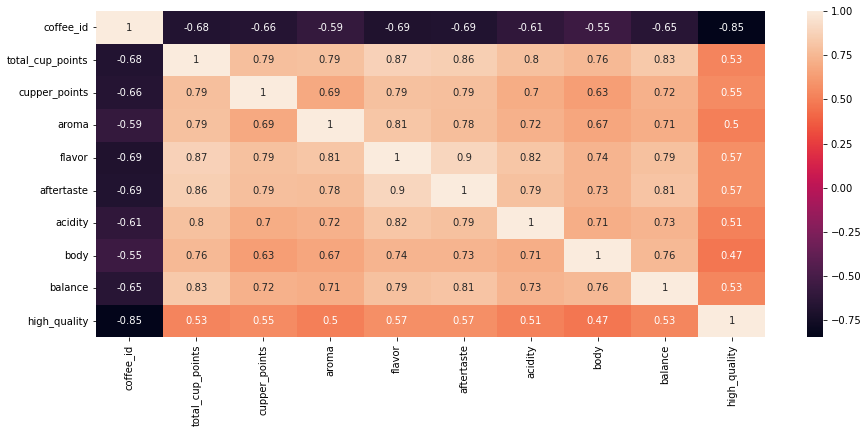

In [12]:
plt.figure(figsize = (15,6))
sns.heatmap( coffe_df.corr(), annot=True) 

in prima analisi possiamo escludere la colonna e riga di coffe_id che era usata solo come identificativo del caffè e high_quality che è la mia variabile dummy, escludendo anche i punteggi dati e concentrandomi più sulle proprietà del caffè.
noto le seguenti correlazioni più significative, basandomi su di un indice di correlazione >0.75:
- aroma è correlata in modo significativo a flavor e anche aftertaste
- flavor ad acidity, balance, aftertaste, aroma
- aftertaste a balance, acidity, flavor, aroma
- balance a body


creo un pairplot che mi consente di fare il plot di tutte le coppie di variabili all'interno del dataset.
in particolare vorrò rappresentare le variabili più significative che ho individuato prima

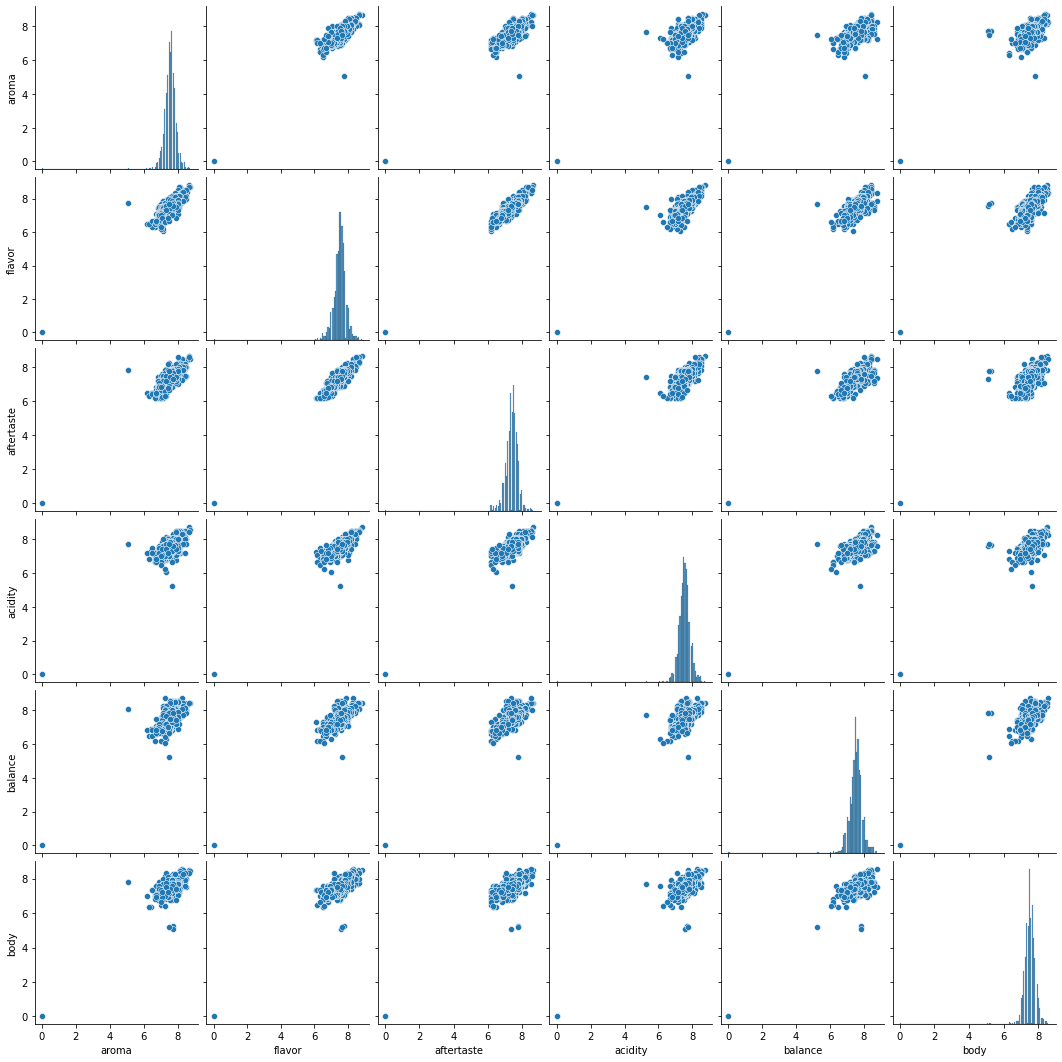

In [13]:
 # seleziono le variabili che voglio rappresentare 
sns.pairplot(coffe_df[["aroma", "flavor","aftertaste", "acidity", "balance", "body"]])

in prima analisi si nota come i dati non siano spari ma ben concentrati, ad eccezione di qualche outliers

rappresento le variabili che ho ritenuto più significative tramite un boxplot per vederne la distribuzione, e noto che gli ordini di grandezza sono simili non dovendo cosi incidere sul modello

In [14]:
# creo un df per semplicità non dovendo usare ogni volta gli index
# per selezionare le mie colonne
coffe_df_shaped = coffe_df[["aroma", "flavor","aftertaste", "acidity", "balance", "body"]]
coffe_df_shaped.head()

,aroma,flavor,aftertaste,acidity,balance,body
0,8.67,8.83,8.67,8.75,8.42,8.50
1,8.75,8.67,8.50,8.58,8.42,8.42
2,8.42,8.50,8.42,8.42,8.42,8.33
3,8.17,8.58,8.42,8.42,8.25,8.50
4,8.25,8.50,8.25,8.50,8.33,8.42


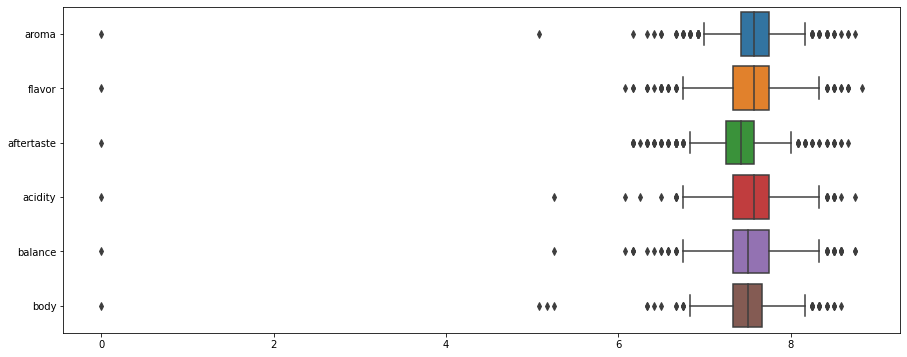

In [15]:
plt.figure(figsize = (15,6))
sns.boxplot(data = coffe_df_shaped, orient = "h")
plt.show()

procedo alla normalizzazione del dataset per le variabili ritenute significative

In [16]:
#normalizzo i dati 
coffe_norma = normalize(coffe_df_shaped) 
# dato che la normalizzazione mi restituisce un array lo trasformo in df
coffe_norma_df = pd.DataFrame(coffe_norma, columns = coffe_df_shaped.columns)
coffe_norma_df.head()

,aroma,flavor,aftertaste,acidity,balance,body
0,0.409612,0.417171,0.409612,0.413391,0.397801,0.401580
1,0.417429,0.413613,0.405503,0.409319,0.401686,0.401686
2,0.408322,0.412202,0.408322,0.408322,0.408322,0.403958
3,0.397488,0.417435,0.409651,0.409651,0.401380,0.413543
4,0.402123,0.414309,0.402123,0.414309,0.406023,0.410409


In [17]:
coffe_norma_df.describe() # .describe mi riporta una descrizione dei dati per ogni colonna

,aroma,flavor,aftertaste,acidity,balance,body
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,0.410968,0.408331,0.401829,0.409264,0.408220,0.408326
std,0.015181,0.013489,0.013729,0.014828,0.014992,0.015586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.405492,0.404551,0.397498,0.404269,0.403520,0.403456
50%,0.411261,0.409101,0.402542,0.409651,0.407422,0.408736
75%,0.416816,0.413258,0.407495,0.415293,0.412090,0.414140
max,0.455648,0.450790,0.455492,0.455492,0.463613,0.453420


### 3. fitto il modello k-means

suppongo l'esistenza di un numero di cluster k = 4 .questa è una ipotesi totalmente arbitraria, 
alla fine di questa prima prova cercherò il numero ideale di kluster tramite l'indice di silhouette.

In [18]:
coffe_kmeans = KMeans(n_clusters = 4) 

fitto il mio df k_means con il df coffe_norma_df, l'idea dietro è quello di scegliere i migliori valori dei parametri 
che descrivono meglio i dati, in questo caso considero i valori normalizzati

In [19]:
coffe_kmeans.fit(coffe_norma_df) 

KMeans(n_clusters=4)

In [20]:
# trovo i centroidi 
coffe_centroids = coffe_kmeans.cluster_centers_
coffe_centroids # ne mostro le coordinate

array([[0.41326477, 0.40529764, 0.39573212, 0.41371375, 0.40497461,
        0.41568623],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.4032251 , 0.40725562, 0.40501569, 0.40677917, 0.41598194,
        0.4105311 ],
       [0.41630881, 0.41238403, 0.40477996, 0.40860748, 0.40520088,
        0.40154283]])

dalle coordinate dei centroidi noto come uno è esattamente 0, successivamente creo il grafico e cerco un numero di cluster più
adatto al mio modello

In [21]:
#aggiungo la categoria cluster ai miei dataset cosi poi da farne il grafico e confrontarli

coffe_kmeans.labels_

coffe_norma_df["cluster"] = coffe_kmeans.labels_

coffe_df["cluster"] = coffe_kmeans.labels_


creo il grafico confrontando i dati non normalizzati e normalizzati con categorie diverse per vedere come cambiano i gruppi.

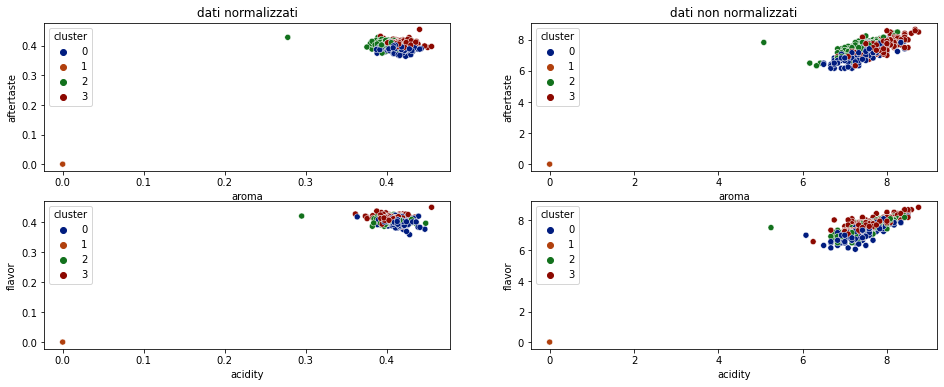

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (16, 6))


ax1 = sns.scatterplot(x = "aroma", y = "aftertaste", data = coffe_norma_df, 
                      hue = "cluster", 
                      palette = "dark", 
                      ax = ax1, legend= True,).set(title = "dati normalizzati")
ax2 = sns.scatterplot(x = "aroma", y = "aftertaste", data = coffe_df, 
                      hue = "cluster", 
                      palette = "dark",
                      ax = ax2, legend= True).set(title = "dati non normalizzati")
ax3 = sns.scatterplot(x = "acidity", y = "flavor", data = coffe_norma_df, 
                      hue = "cluster", 
                      palette = "dark", 
                      ax = ax3, legend= True,)

ax4 = sns.scatterplot(x = "acidity", y = "flavor", data = coffe_df, 
                      hue = "cluster", 
                      palette = "dark",
                      ax = ax4, legend= True)

plt.show()

noto come il cluster n°1 corrisponde ai valori uguali a 0, invece per quanto riguarda la divisione dei cluster questi sono rimasti molto concentrati senza una chiara divisione

creo un nuovo pairplot il quale però questa volta usa la colonna "cluster" come su cui basarsi per creare le suddivisioni all'interno del grafico

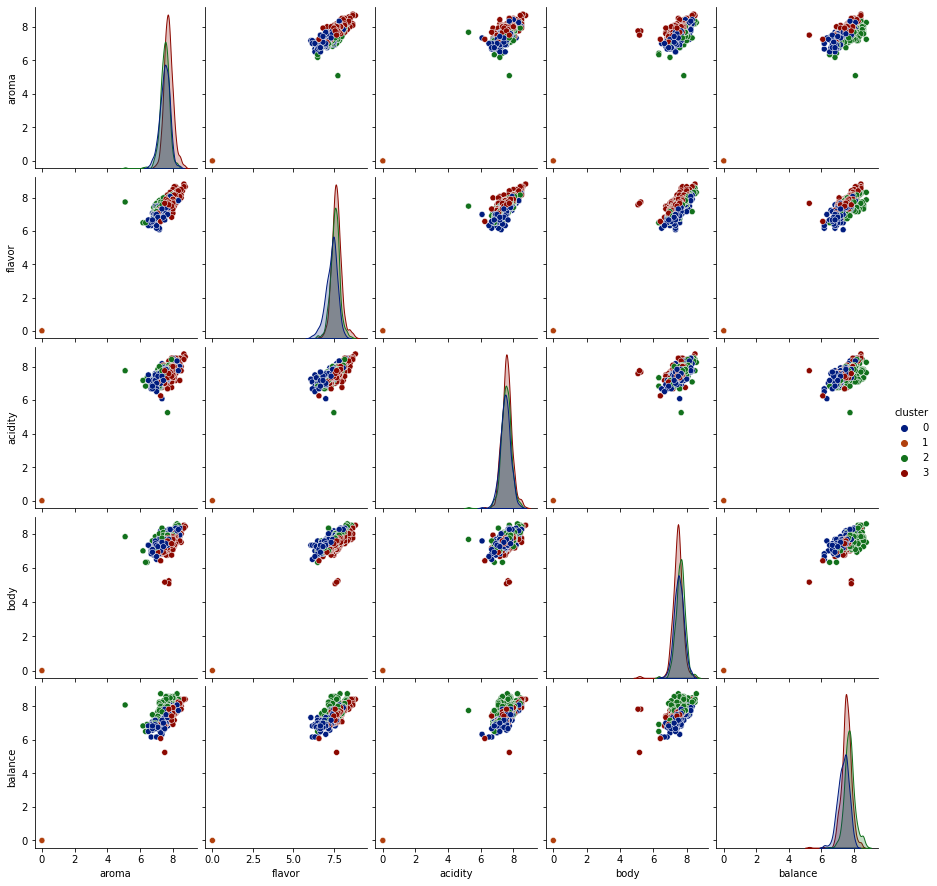

In [23]:
sns.pairplot(coffe_df[["aroma", "flavor","cluster", "acidity", "body", "balance"]],
            hue = "cluster", palette = "dark")

ora cerco il numero ideale di kluster tramite l'indice di silhouette provando ad iterare k da 2 a 15

In [24]:
k_test = range(2,15,1) # creo il mio range da 2 a 15 con passo 1
silhouette_scores = {}

for k in k_test:
    model_kmeans_k = KMeans( n_clusters = k )
    model_kmeans_k.fit(coffe_norma_df.drop("cluster", axis = 1))
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(coffe_norma_df.drop("cluster", axis=1), labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
    
print("finito")

Tested kMeans with k = 2	SS: 0.9706
Tested kMeans with k = 3	SS: 0.1489
Tested kMeans with k = 4	SS: 0.1472
Tested kMeans with k = 5	SS: 0.1527
Tested kMeans with k = 6	SS: 0.1424
Tested kMeans with k = 7	SS: 0.1473
Tested kMeans with k = 8	SS: 0.1447
Tested kMeans with k = 9	SS: 0.1451
Tested kMeans with k = 10	SS: 0.1319
Tested kMeans with k = 11	SS: 0.1242
Tested kMeans with k = 12	SS: 0.1303
Tested kMeans with k = 13	SS: 0.1330
Tested kMeans with k = 14	SS: 0.1285
finito


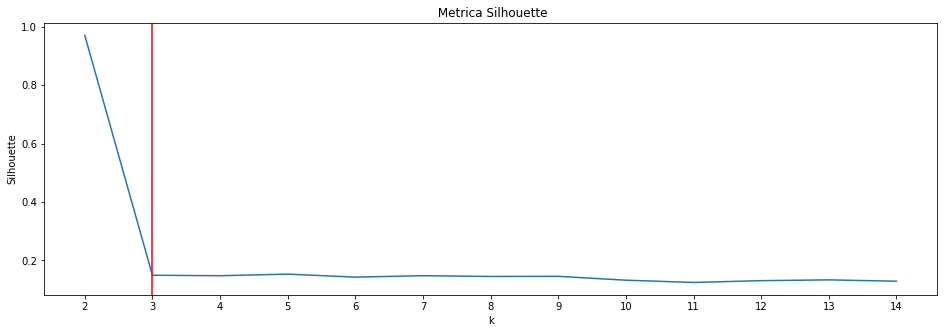

In [25]:
# rappresento il grafico della metrica di silhouette cosi da vedere il numero di cluster ideale
plt.figure(figsize = (16,5))
plt.plot(silhouette_scores.values())
plt.xticks(range(0,13,1), silhouette_scores.keys())
plt.title(" Metrica Silhouette")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1, color = "r")
plt.show()


dal grafico vedo come il numero di cluster ideale sia k = 3

ripeto gli stessi passaggi di prima ma con un numero di cluster = 3

### 4. rifaccio il modello con un numero di cluster = 3

In [26]:
coffe_kmeans_3k = KMeans(n_clusters = 3) 

In [27]:
coffe_kmeans_3k.fit(coffe_norma_df) 

KMeans(n_clusters=3)

In [28]:
# trovo i centroidi 
coffe_centroids_3 = coffe_kmeans_3k.cluster_centers_
coffe_centroids # ne mostro le coordinate

array([[0.41326477, 0.40529764, 0.39573212, 0.41371375, 0.40497461,
        0.41568623],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.4032251 , 0.40725562, 0.40501569, 0.40677917, 0.41598194,
        0.4105311 ],
       [0.41630881, 0.41238403, 0.40477996, 0.40860748, 0.40520088,
        0.40154283]])

creo un df copio di coffe_norma_df e coffe_df cosi da poterlo modellarlo per un numero di cluster = 3

In [29]:
coffe_norma_3k = coffe_norma_df
coffe_df_3k = coffe_df

In [30]:
#aggiungo la categoria cluster ai miei dataset cosi poi da farne il grafico e confrontarli

coffe_kmeans_3k.labels_

coffe_norma_3k["cluster"] = coffe_kmeans_3k.labels_

coffe_df_3k["cluster"] = coffe_kmeans_3k.labels_

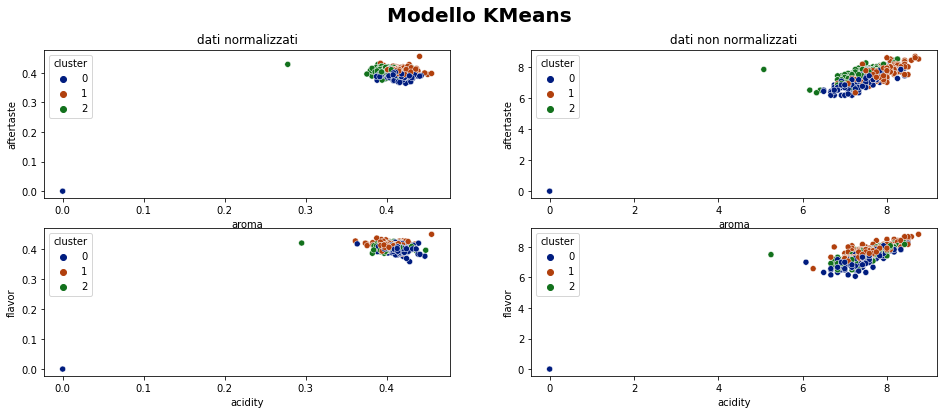

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (16, 6))


ax1 = sns.scatterplot(x = "aroma", y = "aftertaste", data = coffe_norma_3k, 
                      hue = "cluster", 
                      palette = "dark", 
                      ax = ax1, legend= True,).set(title = "dati normalizzati")
ax2 = sns.scatterplot(x = "aroma", y = "aftertaste", data = coffe_df_3k, 
                      hue = "cluster", 
                      palette = "dark",
                      ax = ax2, legend= True).set(title = "dati non normalizzati")
ax3 = sns.scatterplot(x = "acidity", y = "flavor", data = coffe_norma_3k, 
                      hue = "cluster", 
                      palette = "dark", 
                      ax = ax3, legend= True,)

ax4 = sns.scatterplot(x = "acidity", y = "flavor", data = coffe_df_3k, 
                      hue = "cluster", 
                      palette = "dark",
                      ax = ax4, legend= True)

fig.suptitle(" Modello KMeans", 
             weight = "bold",
             fontsize = 20)

plt.show()

rispetto al grafico precedente noto come il valore in 0,0 questa volta appartiene al cluster n°0 al posto di aver formato un'ulteriore cluster, come mi aspettavo dato che ho assegnato un numero di cluster uguale a 3.
anche qui i cluster non sono molto separati

### valori dummies


Trasformo tutte le variabili categoriche in dummies

In [32]:
coffe_dummies = pd.get_dummies(coffe_df, columns = ["continent", "country_of_origin", "species"])    
coffe_dummies

,coffee_id,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,high_quality,...,country_of_origin_Rwanda,country_of_origin_Taiwan,country_of_origin_Tanzania,country_of_origin_Thailand,country_of_origin_Uganda,country_of_origin_United States of America,country_of_origin_Vietnam,country_of_origin_Zambia,species_Arabica,species_Robusta
0,1,90.58,8.75,8.67,8.83,8.67,8.75,8.50,8.42,1,...,0,0,0,0,0,0,0,0,1,0
1,2,89.92,8.58,8.75,8.67,8.50,8.58,8.42,8.42,1,...,0,0,0,0,0,0,0,0,1,0
2,3,89.75,9.25,8.42,8.50,8.42,8.42,8.33,8.42,1,...,0,0,0,0,0,0,0,0,1,0
3,4,89.00,8.67,8.17,8.58,8.42,8.42,8.50,8.25,1,...,0,0,0,0,0,0,0,0,1,0
4,5,88.83,8.58,8.25,8.50,8.25,8.50,8.42,8.33,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1335,78.75,7.83,7.75,7.58,7.33,7.58,5.08,7.83,0,...,0,0,0,0,0,0,0,0,0,1
1335,1336,78.08,8.58,7.50,7.67,7.75,7.75,5.17,5.25,0,...,0,0,0,0,0,0,0,0,0,1
1336,1337,77.17,7.17,7.33,7.33,7.17,7.42,7.50,7.17,0,...,0,0,0,0,0,1,0,0,0,1
1337,1338,75.08,6.92,7.42,6.83,6.75,7.17,7.25,7.00,0,...,0,0,0,0,0,0,0,0,0,1
